# Chapter 10

In [2]:
cd(homedir()*"/PacktPub/Chp10")
const Chp10 = pwd()

"/Users/malcolm/PacktPub/Chp10"

## Statistical Modelling

In [3]:
using Loess, Plots
gr()

Plots.GRBackend()

In [4]:
x = 10 .* rand(50)
y = 0.1*x .* sin.(x) .+ 0.2 * rand(50)
model = loess(x, y);

In [5]:
u = collect(minimum(x):0.1:maximum(x));
v = Loess.predict(model, u);

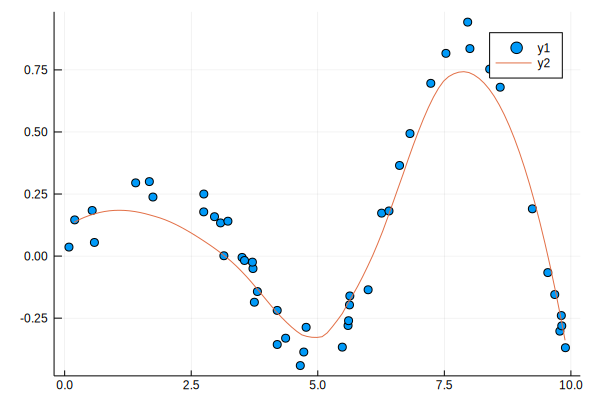

In [6]:
p = scatter(x,y)
plot!(p,u,v)

---

### Loss Functions

In [7]:
using LossFunctions

In [8]:
L2DistLoss()

LPDistLoss{2}()

In [9]:
true_targets = [  1,  0, -2, 1, 1.5] ;
pred_outputs = [0.5,  2, -1, 1, 2];

value(L2DistLoss(), true_targets, pred_outputs)
loss = L2DistLoss()

hcat(value(loss, true_targets, pred_outputs),
     deriv(loss, true_targets, pred_outputs), 
     deriv2(loss,true_targets, pred_outputs))'

3×5 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
  0.25  4.0  1.0  0.0  0.25
 -1.0   4.0  2.0  0.0  1.0 
  2.0   2.0  2.0  2.0  2.0 

In [10]:
A = rand(3,4)

3×4 Array{Float64,2}:
 0.285617  0.777066  0.0409614  0.771119
 0.441327  0.960023  0.0315692  0.52458 
 0.52981   0.325035  0.806926   0.172963

In [11]:
B = rand(3,4)

3×4 Array{Float64,2}:
 0.278831  0.947621  0.493381  0.602726
 0.735245  0.471651  0.550616  0.402018
 0.751749  0.813269  0.506976  0.772886

In [13]:
W = [2,1,3,2];

v1 = value(L2DistLoss(), A, B, AvgMode.WeightedSum(W))
v2 = value(L2DistLoss(), A, B, AvgMode.WeightedMean(W))
round.([v1, v2], digits=4)

  likely near /Users/malcolm/.julia/packages/IJulia/4UizY/src/kernel.jl:50
  likely near /Users/malcolm/.julia/packages/IJulia/4UizY/src/kernel.jl:50


2-element Array{Float64,1}:
 3.2761
 0.1365

In [14]:
deriv(L2DistLoss(), A, B)'

4×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 -0.0135708   0.587837   0.443877
  0.341109   -0.976744   0.976469
  0.904839    1.03809   -0.599899
 -0.336785   -0.245125   1.19985 

In [15]:
deriv2(L2DistLoss(), A, B)'

4×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 2.0  2.0  2.0
 2.0  2.0  2.0
 2.0  2.0  2.0
 2.0  2.0  2.0

### Clustering

In [16]:
using RDatasets, Clustering

# Fully qualify as Metalhead (below) as dataset function
iris = RDatasets.dataset("datasets", "iris")
iris[1:5,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [18]:
features = Matrix(iris[:,[1,2,3,4]])'
result   = kmeans( features, 3)

KmeansResult{Float64}([6.85385 5.006 5.88361; 3.07692 3.428 2.74098; 5.71538 1.462 4.38852; 2.05385 0.246 1.43443], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 3, 1, 1, 1, 3, 1, 1, 3], [0.01998, 0.20038, 0.17398, 0.27598, 0.03558, 0.45838, 0.17238, 0.00438, 0.65198, 0.14158  …  0.157337, 0.441953, 0.731626, 0.112722, 0.272722, 0.355799, 0.822118, 0.399645, 0.691953, 0.7072], [39, 50, 61], [39.0, 50.0, 61.0], 78.85566582597667, 8, true)

In [19]:
fieldnames(KmeansResult)

(:centers, :assignments, :costs, :counts, :cweights, :totalcost, :iterations, :converged)

In [20]:
length(result.assignments) == size(iris)[1]

true

In [21]:
result.iterations, result.converged, result.totalcost

(8, true, 78.85566582597667)

In [22]:
result.assignments'

1×150 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  3  1  1  1  3  1  1  1  3  1  1  3

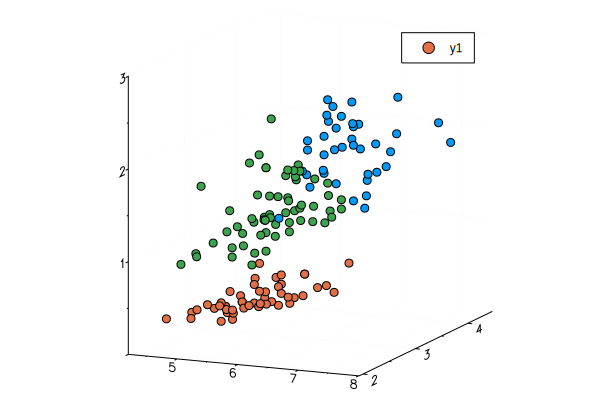

In [23]:
scatter(features[1,:], features[2,:], features[4,:], color = result.assignments)

---

In [27]:
using Queryverse

mtcars = load("Files/mtcars.xlsx","data") |> DataFrame
reshape(names(mtcars),1,12)

1×12 Array{Symbol,2}:
 :Model  :MPG  :Cyl  :Disp  :HP  :DRat  :WT  :QSec  :VS  :AM  :Gear  :Carb

In [28]:
df = @from car in mtcars begin
    @orderby car.MPG, car.HP
    @select {Model=car.Model, MPG=car.MPG, HP=car.HP, WT=car.WT, Disp=car.Disp}
    @collect DataFrame
end

,Model,MPG,HP,WT,Disp
,String,Float64,Float64,Float64,Float64
1,Cadillac Fleetwood,10.4,205.0,5.25,472.0
2,Lincoln Continental,10.4,215.0,5.424,460.0
3,Camaro Z28,13.3,245.0,3.84,350.0
4,Duster 360,14.3,245.0,3.57,360.0
5,Chrysler Imperial,14.7,230.0,5.345,440.0
6,Maserati Bora,15.0,335.0,3.57,301.0
7,AMC Javelin,15.2,150.0,3.435,304.0
8,Merc 450SLC,15.2,180.0,3.78,275.8
9,Dodge Challenger,15.5,150.0,3.52,318.0


In [29]:
features = Matrix(df[:,2:5])'

4×32 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
  10.4    10.4     13.3    14.3    14.7    …  30.4     30.4    32.4  33.9  
 205.0   215.0    245.0   245.0   230.0       52.0    113.0    66.0  65.0  
   5.25    5.424    3.84    3.57    5.345      1.615    1.513   2.2   1.835
 472.0   460.0    350.0   360.0   440.0       75.7     95.1    78.7  71.1  

In [33]:
results = [kmeans( features, i) for i = 2:6]
for i in 1:length(results)
    println(i+1, " => ", results[i].totalcost)
end

2 => 152380.62046149216
3 => 119302.93075560394
4 => 112011.72121085327
5 => 68638.42247331794
6 => 34412.91766400004


In [35]:
result = kmeans( features, 5);

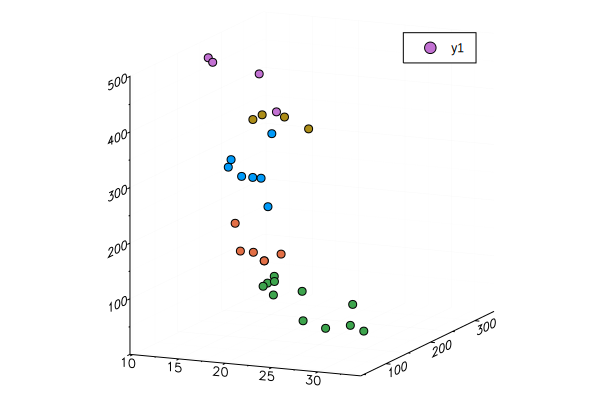

In [36]:
using Plots
gr()   
scatter(features[1,:], features[2,:], features[4,:], color = result.assignments)

---

### Decision Trees

In [41]:
using DecisionTree
using Random, Statistics

In [42]:
# Create a random dataset
Random.seed!(systime())
X = sort(5 * rand(80))
XX = reshape(X, 80, 1)
y = X .* sin.(X)
y[1:5:end] += 3 * (0.5 .- rand(16))
;

In [43]:
# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(pruning_purity_threshold=0.05)
regr_3 = RandomForestRegressor(n_trees=20)
DecisionTree.fit!(regr_1, XX, y)
DecisionTree.fit!(regr_2, XX, y)
DecisionTree.fit!(regr_3, XX, y)
;

In [44]:
# Predict
X_test = 0:0.01:5.0
y_1 = DecisionTree.predict(regr_1, hcat(X_test))
y_2 = DecisionTree.predict(regr_2, hcat(X_test))
y_3 = DecisionTree.predict(regr_3, hcat(X_test))
;

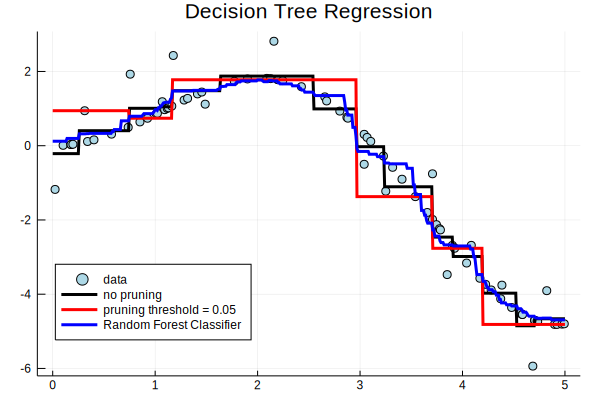

In [45]:
using Plots
gr()
Plots.scatter(X, y, label="data", color="lightblue", legend=:bottomleft)
Plots.plot!(X_test, y_1, color="black", label="no pruning", linewidth=3)
Plots.plot!(X_test, y_2, color="red", label="pruning threshold = 0.05", linewidth=3)
Plots.plot!(X_test, y_3, color="blue", label="Random Forest Classifier", linewidth=3)
Plots.title!("Decision Tree Regression")
